<a href="https://colab.research.google.com/github/brunomsm0/Data-Sciense/blob/main/MarketingDesafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Biblioteca

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Analise descritiva

In [ ]:
base_marketing = pd.read_csv('MKT.csv', sep = ',')
base_marketing.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
base_marketing.tail()

,youtube,facebook,newspaper,sales
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60
170,278.52,10.32,10.44,16.08


In [ ]:
base_marketing.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [ ]:
base_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
base_marketing.describe()

,youtube,facebook,newspaper,sales,investiment,financial_feedback
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807,240.932632,-0.921696
std,102.449597,17.913532,24.902918,6.314608,112.167551,0.023640
min,0.840000,0.000000,0.360000,1.920000,25.680000,-0.970000
25%,91.080000,11.700000,13.740000,12.540000,146.820000,-0.940000
50%,179.760000,26.760000,31.080000,15.480000,248.400000,-0.930000
75%,262.980000,43.680000,50.880000,20.820000,337.740000,-0.910000
max,355.680000,59.520000,121.080000,32.400000,520.320000,-0.840000


#Analise Exploratoria



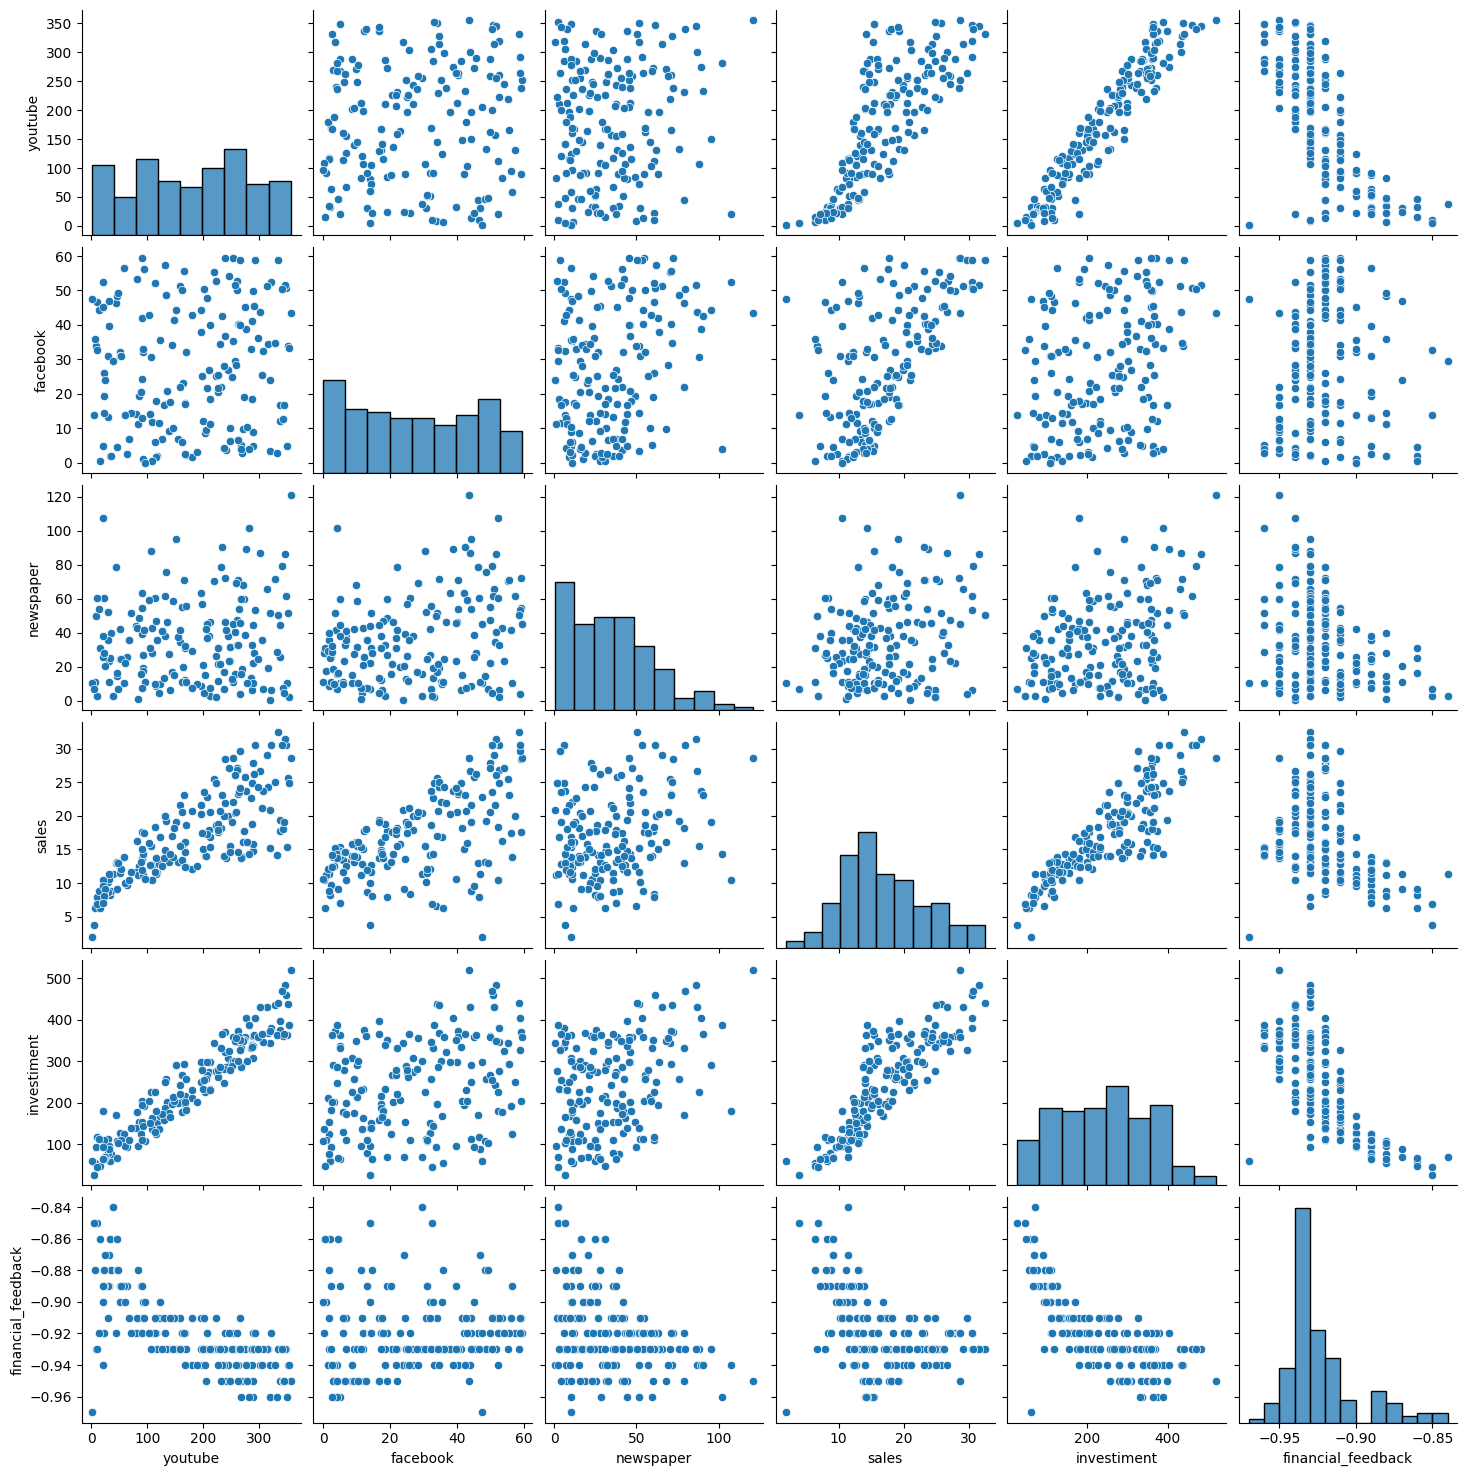

In [ ]:
sns.pairplot(base_marketing)

In [ ]:
marketing_total = pd.DataFrame({'Tipo': base_marketing.columns, 'Total': base_marketing.sum()})
marketing_total.reset_index(inplace=True)
marketing_total = marketing_total[['Tipo', 'Total']]
marketing_total

,Tipo,Total
0,youtube,30441.60
1,facebook,4731.84
2,newspaper,6026.04
3,sales,2893.80


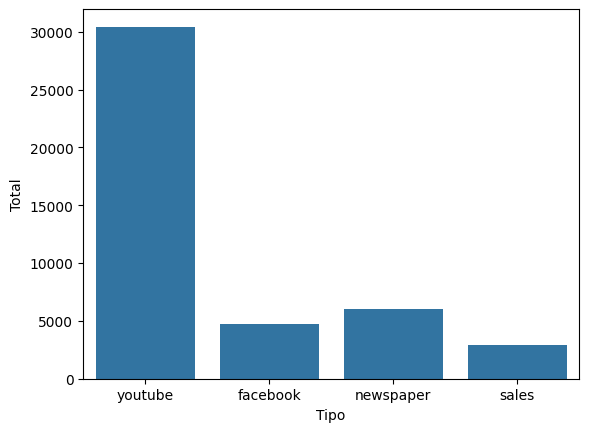

In [ ]:
sns.barplot(data=marketing_total, x='Tipo', y='Total');


Inserção das colunas investment e financial_feedback

- investment: soma de todos os investimentos

- financial_feedback: (sales - investiment)/investiment

In [ ]:
marketing_alt = base_marketing
marketing_alt['investiment'] = marketing_alt['youtube'] + marketing_alt['facebook'] + marketing_alt['newspaper']
marketing_alt['financial_feedback'] = round((marketing_alt['sales'] - marketing_alt['investiment']) / marketing_alt['investiment'], 2)
marketing_alt.head()

,youtube,facebook,newspaper,sales,investiment,financial_feedback
0,84.72,19.20,48.96,12.60,152.88,-0.92
1,351.48,33.96,51.84,25.68,437.28,-0.94
2,135.48,20.88,46.32,14.28,202.68,-0.93
3,116.64,1.80,36.00,11.52,154.44,-0.93
4,318.72,24.00,0.36,20.88,343.08,-0.94


In [ ]:
# Dataframe atualizado
marketing_total = pd.DataFrame({'Tipo': marketing_alt.columns, 'Total': marketing_alt.sum()})
marketing_total.drop(['financial_feedback'], axis=0, inplace=True)
marketing_total.reset_index(inplace=True)
marketing_total = marketing_total[['Tipo', 'Total']]
marketing_total

,Tipo,Total
0,youtube,30441.60
1,facebook,4731.84
2,newspaper,6026.04
3,sales,2893.80
4,investiment,41199.48


In [ ]:
# Verificando a relação entre as colunas.
marketing_alt.corr()

,youtube,facebook,newspaper,sales,investiment,financial_feedback
youtube,1.000000,0.086538,0.110759,0.782030,0.951773,-0.708055
facebook,0.086538,1.000000,0.293425,0.602918,0.303889,0.087514
newspaper,0.110759,0.293425,1.000000,0.254987,0.370040,-0.332136
sales,0.782030,0.602918,0.254987,1.000000,0.867176,-0.375180
investiment,0.951773,0.303889,0.370040,0.867176,1.000000,-0.706474
financial_feedback,-0.708055,0.087514,-0.332136,-0.375180,-0.706474,1.000000


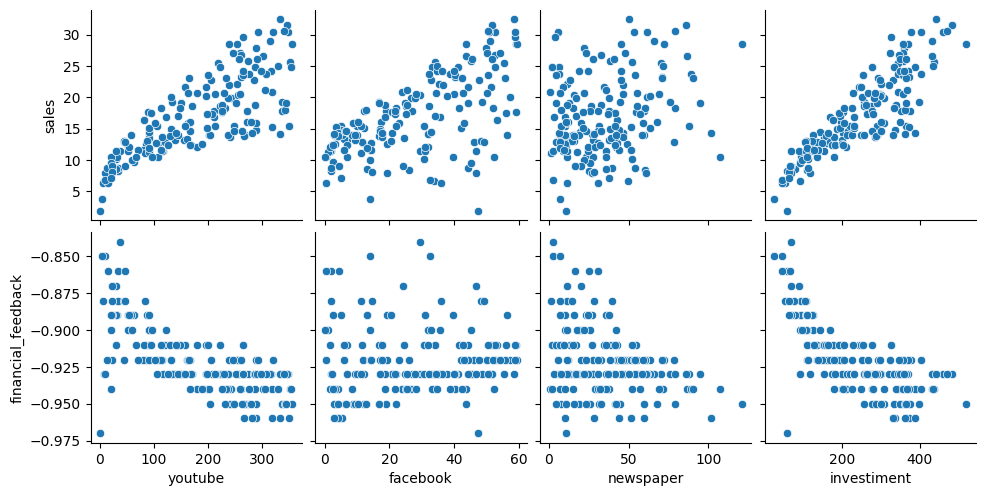

In [ ]:
# Verificando a relacao entre as colunas utilizando graficos
sns.pairplot(base_marketing, x_vars=['youtube', 'facebook', 'newspaper','investiment'], y_vars=['sales', 'financial_feedback']);

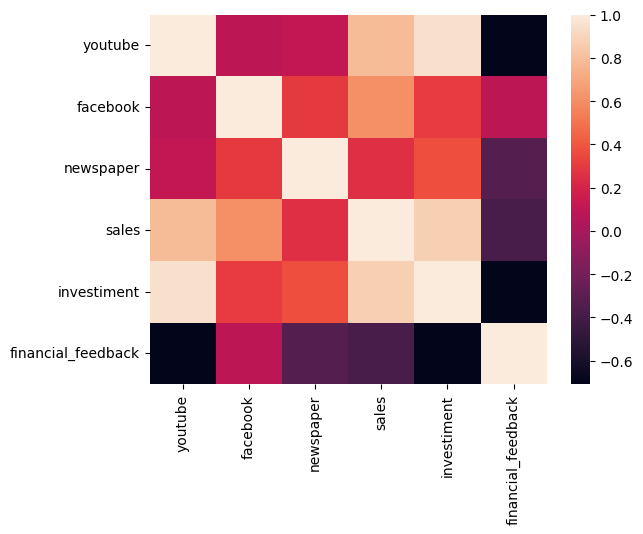

In [ ]:
# Verificando a relação entre as colunas pelo heatmap.
sns.heatmap(marketing_alt.corr());

#MODELAGEM

In [ ]:
X = marketing_alt[['youtube', 'facebook', 'newspaper']]
Y = marketing_alt['sales']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.4, random_state=22)

In [ ]:
regLinear = LinearRegression()
regLinear.fit(X_train, Y_train)

LinearRegression()

#Test

In [ ]:
model_teste = regLinear.predict(X_test)

In [ ]:
acc = r2_score(Y_test, model_teste)
print(acc)

0.8873519615587365


In [ ]:
resultado = round(acc*100)
print(resultado,'%')

89 %
